In [1]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

In [8]:
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


# Plot two columns as scatter plot

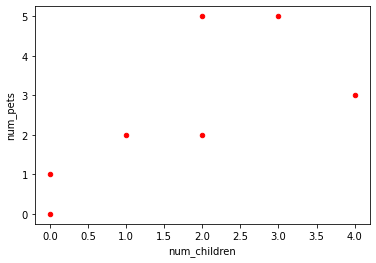

In [2]:
import matplotlib.pyplot as plt


# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()


# Plot column values as bar plot

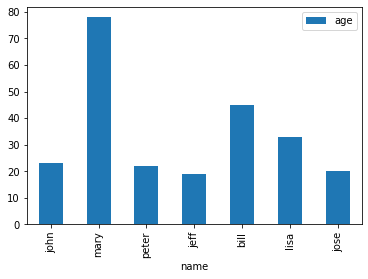

In [3]:
df.plot(kind='bar',x='name',y='age')

# Line plot for multiple columns

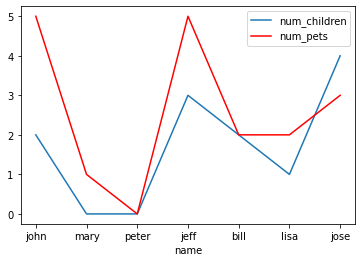

In [5]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

# Save plot to file

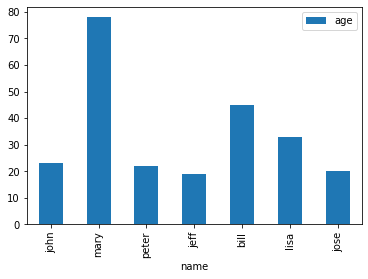

In [6]:
df.plot(kind='bar',x='name',y='age')

# the plot gets saved to 'output.png'
plt.savefig('output.png')

# Bar plot with group by

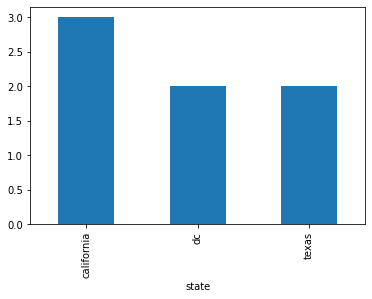

In [7]:
df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

# Stacked bar plot with group by

Example: plot count by category as a stacked column:

* create a dummy variable and do a two-level group-by based on it:

* fix the x axis label and the legend

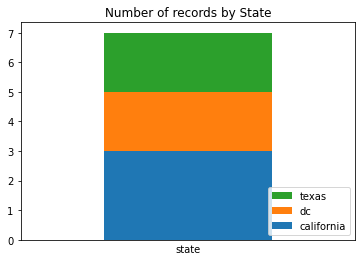

In [9]:
# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by State')

# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()